In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
stock_data = pd.read_csv("THYAO_ENDEKSLI.csv")

In [2]:
print(stock_data)

           Date  Price   Open   High    Low     Vol. Change%  PriceBIST
0    01/02/2017   4.97   4.97   5.00   4.95   24.25M  -0.80%   78138.66
1    01/03/2017   4.88   4.98   4.99   4.88   55.63M  -1.81%   77754.46
2    01/04/2017   4.82   4.90   4.91   4.82   30.17M  -1.23%   76618.20
3    01/05/2017   4.96   4.85   4.98   4.79   85.51M   2.90%   76143.59
4    01/06/2017   4.94   4.94   5.00   4.91   44.00M  -0.40%   76386.30
5    01/09/2017   4.88   4.91   4.91   4.85   38.01M  -1.21%   77106.57
6    01/10/2017   4.83   4.88   4.89   4.82   47.29M  -1.02%   77394.44
7    01/11/2017   4.82   4.81   4.85   4.76   60.30M  -0.21%   77393.69
8    01/12/2017   4.97   4.84   5.02   4.83  106.37M   3.11%   77666.58
9    01/13/2017   5.01   4.97   5.11   4.95  129.88M   0.80%   80891.04
10   01/16/2017   5.10   5.03   5.15   5.03   82.51M   1.80%   81524.32
11   01/17/2017   5.17   5.14   5.18   5.07  101.49M   1.37%   81711.69
12   01/18/2017   5.22   5.21   5.25   5.18   81.28M   0.97%   8

In [3]:
import math
stock_data["Average"] = (stock_data["High"] + stock_data["Low"])/2

In [4]:
input_feature= stock_data.iloc[:,[1,7,8]].values
input_data = input_feature
input_data_INVERSE = input_feature
print(input_data[:,0])

[ 4.97  4.88  4.82  4.96  4.94  4.88  4.83  4.82  4.97  5.01  5.1   5.17
  5.22  5.15  5.19  5.2   5.5   5.36  5.47  5.35  5.6   5.54  5.65  5.68
  5.68  5.6   5.56  5.75  5.75  5.58  5.72  5.74  5.64  5.68  5.71  5.72
  5.72  5.71  5.74  5.65  5.54  5.46  5.68  5.71  5.7   5.7   5.66  5.57
  5.51  5.61  5.65  5.81  5.86  5.92  5.89  5.91  5.74  5.5   5.49  5.53
  5.54  5.55  5.46  5.47  5.47  5.4   5.5   5.48  5.45  5.43  5.59  5.55
  5.56  5.45  5.48  5.53  5.55  5.51  5.59  5.67  5.92  5.92  6.1   6.06
  6.06  6.07  6.11  6.14  6.13  6.43  6.44  6.65  6.5   6.5   6.66  6.72
  6.77  6.69  6.85  7.08  7.14  7.29  7.28  7.31  7.24  7.24  7.15  7.27
  7.42  7.49  7.42  7.33  7.39  7.38  7.31  7.44  7.36  7.27  7.45  7.41
  7.45  7.6   7.77  7.99  7.81  8.05  8.06  8.35  8.23  8.31  8.38  8.67
  8.62  8.6   8.76  8.83  8.94  8.86  8.96  8.74  8.84  8.84  8.79  8.69
  8.78  8.66  8.83  8.64  8.66  8.67  8.87  9.07  9.05  8.92  8.84  9.
  9.5   9.28  9.3   9.3   9.26  9.39  9.56  9.46  9.5

In [5]:
lookback= 50
test_size=int(.6 * len(stock_data))
print(test_size)

363


In [6]:
Train_ORG=input_data_INVERSE[:test_size+lookback]
Test_ORG=input_data_INVERSE[test_size+lookback:]

print(Test_ORG[:,0])

[15.37 16.   16.48 16.77 16.56 16.28 17.11 16.97 17.2  17.06 17.15 17.
 17.95 18.   18.19 17.73 17.66 18.2  18.4  18.12 18.53 19.19 18.84 19.22
 19.1  19.09 18.62 18.08 17.74 17.08 17.57 17.83 17.57 16.7  16.5  17.49
 18.08 17.43 16.55 16.55 16.19 15.72 15.53 15.54 15.94 15.46 14.6  14.05
 14.6  15.23 15.28 14.72 15.59 14.65 15.17 14.78 15.49 16.2  16.18 15.97
 16.35 15.85 16.4  16.29 16.89 17.11 17.08 17.23 16.95 17.   16.3  15.96
 16.33 16.39 16.19 16.1  15.96 15.25 15.4  14.96 14.69 15.41 16.17 16.37
 16.33 16.16 16.18 16.16 16.25 16.01 16.11 15.72 15.14 15.11 15.06 15.11
 14.95 14.96 15.08 15.03 14.59 14.39 14.17 14.44 14.54 14.4  14.69 14.76
 14.67 15.06 15.2  15.81 15.42 14.76 14.95 14.51 14.85 14.65 14.71 15.24
 14.45 13.8  14.16 13.69 13.34 13.34 13.43 13.64 14.12 14.03 14.39 14.
 14.14 13.97 13.91 14.27 14.11 13.7  13.21 12.96 13.1  12.76 13.03 12.98
 13.97 14.2  14.22 14.14 13.49 14.06 13.48 12.73 12.6  12.93 13.   12.97
 13.4  14.31 14.55 14.16 14.46 13.97 14.03 13.89 13.94 

In [7]:
from sklearn.preprocessing import MinMaxScaler
sc1= MinMaxScaler(feature_range=(0,1))
sc2= MinMaxScaler(feature_range=(0,1))
sc3=MinMaxScaler(feature_range=(0,1))

stock_prices = Test_ORG[:,0]
stock_bist = Test_ORG[:,1]
stock_average = Test_ORG[:,2]

stock_P=stock_prices.reshape(-1,1)
stock_B=stock_bist.reshape(-1,1)
stock_A=stock_average.reshape(-1,1)

input_data_prices = sc1.fit(stock_P)
input_price=input_data_prices.transform(stock_P)
input_price_reverse=sc1.inverse_transform(input_price)

input_data_bist = sc2.fit(stock_B)
input_bist=input_data_bist.transform(stock_B)
input_bist_reverse=sc2.inverse_transform(input_bist)

input_data_average = sc3.fit(stock_A)
input_average=input_data_average.transform(stock_A)
input_average_reverse=sc3.inverse_transform(input_average)

input_data4 = np.hstack((input_price, input_bist, input_average))

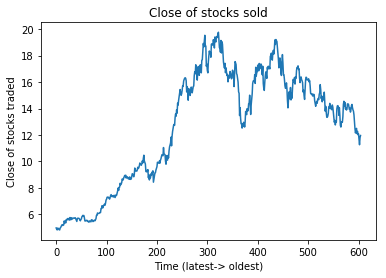

In [8]:
plt.plot(input_feature[:,0])
plt.title("Close of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Close of stocks traded")
plt.show()

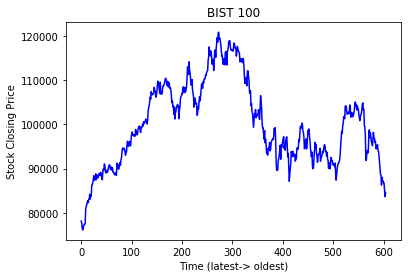

In [9]:
plt.plot(input_feature[:,1], color='blue')
plt.title("BIST 100")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Closing Price")
plt.show()

In [10]:
scTrain= MinMaxScaler(feature_range=(0,1))
scTest= MinMaxScaler(feature_range=(0,1))

Train=input_data[:test_size+lookback]
Test=input_data[test_size+lookback:]

Train_feature=input_feature[:test_size+lookback]
Test_feature=input_feature[test_size+lookback:]

Train[:,0:3] = scTrain.fit_transform(Train_feature[:,:])
Test[:,0:3] = scTest.fit_transform(Test_feature[:,:])
print(input_data.shape)
print(Test.shape)
print(Train.shape)

(605, 3)
(192, 3)
(413, 3)


In [11]:
X_train=[]
y_train=[]
for i in range(len(Train)-lookback-1):
    t_train=[]
    for j in range(0,lookback):        
        
        t_train.append(Train[[(i+j)], :])
    X_train.append(t_train)
    y_train.append(Train[i+ lookback,0])

In [12]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train=X_train.reshape(X_train.shape[0], lookback , 3)

In [13]:
print(y_train.shape)

(362,)


In [15]:
look=lookback-1
X_test = []
y_test = []
for i in range(len(Test)-look):
    t_test=[]
    for j in range(0,lookback):        
        
        t_test.append(Test[[(i+j)], :])
    if(i<len(Test)-look-1):    
        y_test.append(Test[i+ lookback,0])
    X_test.append(t_test)           

In [16]:
X_test, y_test= np.array(X_test), np.array(y_test)
X_test=X_test.reshape(X_test.shape[0], lookback , 3)

In [17]:
print(X_test.shape)
y_test.shape

(143, 50, 3)


(142,)

In [18]:
from keras import Sequential
from keras.layers import Dense, LSTM

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1],3)))
#model.add(LSTM(30, return_sequences=True))
#model.add(LSTM(30))
model.add(Dense(units=1))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               67584     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 67,713
Trainable params: 67,713
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
362/362 [==============================] - 2s 4ms/step - loss: 0.1020
Epoch 2/100
362/362 [==============================] - 1s 2ms/step - loss: 0.0117
Epoch 3/100
362/362 [==============================] - 1s 2ms/step - loss: 0.0049
Epoch 4/100
362/362 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 5/100
362/362 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 6/100
362/362 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 7/100
362/362 [==============================] - 1s 3ms/step - loss: 0.0018
Epoch 8/100
362/362 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 9/100
362/362 [==============================] - 1s 2ms/step - loss: 0.0016
Epoch 10/100
362/362 [==============================] - 1s 2ms/step - loss: 0.0018
Epoch 11/100
362/362 [==============================] - 1s 3ms/step - loss: 0.0017
Epoch 12/100
362/362 [==========================

Epoch 94/100
362/362 [==============================] - 1s 3ms/step - loss: 7.5065e-04
Epoch 95/100
362/362 [==============================] - 1s 2ms/step - loss: 7.4801e-04
Epoch 96/100
362/362 [==============================] - 1s 2ms/step - loss: 7.5885e-04
Epoch 97/100
362/362 [==============================] - 1s 2ms/step - loss: 7.2735e-04
Epoch 98/100
362/362 [==============================] - 1s 2ms/step - loss: 7.4943e-04
Epoch 99/100
362/362 [==============================] - 1s 2ms/step - loss: 8.4823e-04
Epoch 100/100
362/362 [==============================] - 1s 3ms/step - loss: 7.8214e-04


In [22]:
X_test.shape

(143, 50, 3)

In [23]:
predicted_value= model.predict(X_test)
print(predicted_value)

[[0.4152461 ]
 [0.44826064]
 [0.46147245]
 [0.48936245]
 [0.48649228]
 [0.48399585]
 [0.473103  ]
 [0.48436856]
 [0.5304555 ]
 [0.5773276 ]
 [0.6082468 ]
 [0.6369795 ]
 [0.63736045]
 [0.64406484]
 [0.6470375 ]
 [0.67052424]
 [0.70664644]
 [0.73351085]
 [0.7557734 ]
 [0.7586839 ]
 [0.75100994]
 [0.7158164 ]
 [0.6649287 ]
 [0.6328447 ]
 [0.62010765]
 [0.61322606]
 [0.6102493 ]
 [0.603071  ]
 [0.5730858 ]
 [0.54663706]
 [0.5135741 ]
 [0.48015618]
 [0.47944486]
 [0.52347064]
 [0.5768756 ]
 [0.6217469 ]
 [0.6464838 ]
 [0.6548626 ]
 [0.65224683]
 [0.6497785 ]
 [0.6361087 ]
 [0.62481153]
 [0.6061734 ]
 [0.56737673]
 [0.52955604]
 [0.505384  ]
 [0.49188045]
 [0.48296654]
 [0.48055694]
 [0.4838348 ]
 [0.48420298]
 [0.470568  ]
 [0.44535136]
 [0.41832873]
 [0.4030879 ]
 [0.40212783]
 [0.39576536]
 [0.4010383 ]
 [0.4110672 ]
 [0.41783607]
 [0.43342507]
 [0.4528125 ]
 [0.49106836]
 [0.51349956]
 [0.4980613 ]
 [0.47942138]
 [0.44911242]
 [0.43214518]
 [0.42247438]
 [0.41852862]
 [0.43748757]
 [0.43

In [29]:
predicted_stock_price= sc1.inverse_transform(predicted_value)
print(predicted_stock_price)
print(predicted_stock_price.shape)

[[14.565359 ]
 [14.828155 ]
 [14.933321 ]
 [15.155325 ]
 [15.132479 ]
 [15.112607 ]
 [15.0259   ]
 [15.115574 ]
 [15.482427 ]
 [15.855528 ]
 [16.101645 ]
 [16.330357 ]
 [16.33339  ]
 [16.386755 ]
 [16.41042  ]
 [16.597372 ]
 [16.884907 ]
 [17.098745 ]
 [17.275957 ]
 [17.299124 ]
 [17.238039 ]
 [16.957897 ]
 [16.552834 ]
 [16.297445 ]
 [16.196058 ]
 [16.14128  ]
 [16.117584 ]
 [16.060446 ]
 [15.821763 ]
 [15.611231 ]
 [15.34805  ]
 [15.082043 ]
 [15.076381 ]
 [15.4268265]
 [15.851931 ]
 [16.209105 ]
 [16.406012 ]
 [16.472706 ]
 [16.451885 ]
 [16.432236 ]
 [16.323425 ]
 [16.2335   ]
 [16.08514  ]
 [15.776319 ]
 [15.4752655]
 [15.282857 ]
 [15.175368 ]
 [15.104413 ]
 [15.085233 ]
 [15.111325 ]
 [15.114256 ]
 [15.005721 ]
 [14.8049965]
 [14.589897 ]
 [14.46858  ]
 [14.4609375]
 [14.410293 ]
 [14.452265 ]
 [14.532095 ]
 [14.585975 ]
 [14.710063 ]
 [14.8643875]
 [15.168904 ]
 [15.347457 ]
 [15.224567 ]
 [15.076194 ]
 [14.834934 ]
 [14.699876 ]
 [14.622896 ]
 [14.591488 ]
 [14.742401 ]
 [14.7

In [25]:
y_test=y_test.reshape(-1,1)
print(y_test.shape)

(142, 1)


In [26]:
y_test_extended = np.zeros((len(y_test),3))
y_test_extended[:,2] = y_test[:,0]

In [27]:
y_test_extended=scTest.inverse_transform(y_test_extended)[:, [2]]

In [28]:
print(y_test_extended)

[[15.45414573]
 [14.90610553]
 [15.75752513]
 [14.8376005 ]
 [15.34649497]
 [14.96482412]
 [15.6596608 ]
 [16.35449749]
 [16.33492462]
 [16.12940955]
 [16.50129397]
 [16.01197236]
 [16.55022613]
 [16.44257538]
 [17.02976131]
 [17.24506281]
 [17.21570352]
 [17.3625    ]
 [17.0884799 ]
 [17.13741206]
 [16.45236181]
 [16.11962312]
 [16.48172111]
 [16.5404397 ]
 [16.34471106]
 [16.25663317]
 [16.11962312]
 [15.42478643]
 [15.57158291]
 [15.1409799 ]
 [14.87674623]
 [15.58136935]
 [16.32513819]
 [16.52086683]
 [16.48172111]
 [16.31535176]
 [16.33492462]
 [16.31535176]
 [16.40342965]
 [16.16855528]
 [16.2664196 ]
 [15.88474874]
 [15.31713568]
 [15.28777638]
 [15.23884422]
 [15.28777638]
 [15.13119347]
 [15.1409799 ]
 [15.25841709]
 [15.20948492]
 [14.77888191]
 [14.58315327]
 [14.36785176]
 [14.63208543]
 [14.72994975]
 [14.5929397 ]
 [14.87674623]
 [14.94525126]
 [14.85717337]
 [15.23884422]
 [15.37585427]
 [15.97282663]
 [15.59115578]
 [14.94525126]
 [15.13119347]
 [14.70059045]
 [15.03332

In [39]:
NextPredictedDay=predicted_stock_price[-1]
print("Next Day = " , NextPredictedDay)

Next Day =  [11.847085]


In [31]:
predicted_stock_price_Size=np.resize(predicted_stock_price, predicted_stock_price.size - 1)
print(predicted_stock_price_Size)

[14.565359  14.828155  14.933321  15.155325  15.132479  15.112607
 15.0259    15.115574  15.482427  15.855528  16.101645  16.330357
 16.33339   16.386755  16.41042   16.597372  16.884907  17.098745
 17.275957  17.299124  17.238039  16.957897  16.552834  16.297445
 16.196058  16.14128   16.117584  16.060446  15.821763  15.611231
 15.34805   15.082043  15.076381  15.4268265 15.851931  16.209105
 16.406012  16.472706  16.451885  16.432236  16.323425  16.2335
 16.08514   15.776319  15.4752655 15.282857  15.175368  15.104413
 15.085233  15.111325  15.114256  15.005721  14.8049965 14.589897
 14.46858   14.4609375 14.410293  14.452265  14.532095  14.585975
 14.710063  14.8643875 15.168904  15.347457  15.224567  15.076194
 14.834934  14.699876  14.622896  14.591488  14.742401  14.731269
 14.4728155 14.261536  14.014463  13.738177  13.5036125 13.371906
 13.366982  13.542466  13.742986  13.974448  14.069884  14.111642
 14.070894  13.983341  13.991499  14.004694  13.9040985 13.645379
 13.340499  

In [32]:
from sklearn.metrics import mean_squared_error
rmse=math.sqrt(mean_squared_error(y_test_extended,predicted_stock_price_Size))
print("RMSE on test set = %3f%%" %  rmse)

RMSE on test set = 0.516557%


In [33]:
input_PLOT= stock_data.iloc[:,[1,7,8]].values
print(input_PLOT[:,0])
INPUT=input_PLOT
INPUT1=input_PLOT

[ 4.97  4.88  4.82  4.96  4.94  4.88  4.83  4.82  4.97  5.01  5.1   5.17
  5.22  5.15  5.19  5.2   5.5   5.36  5.47  5.35  5.6   5.54  5.65  5.68
  5.68  5.6   5.56  5.75  5.75  5.58  5.72  5.74  5.64  5.68  5.71  5.72
  5.72  5.71  5.74  5.65  5.54  5.46  5.68  5.71  5.7   5.7   5.66  5.57
  5.51  5.61  5.65  5.81  5.86  5.92  5.89  5.91  5.74  5.5   5.49  5.53
  5.54  5.55  5.46  5.47  5.47  5.4   5.5   5.48  5.45  5.43  5.59  5.55
  5.56  5.45  5.48  5.53  5.55  5.51  5.59  5.67  5.92  5.92  6.1   6.06
  6.06  6.07  6.11  6.14  6.13  6.43  6.44  6.65  6.5   6.5   6.66  6.72
  6.77  6.69  6.85  7.08  7.14  7.29  7.28  7.31  7.24  7.24  7.15  7.27
  7.42  7.49  7.42  7.33  7.39  7.38  7.31  7.44  7.36  7.27  7.45  7.41
  7.45  7.6   7.77  7.99  7.81  8.05  8.06  8.35  8.23  8.31  8.38  8.67
  8.62  8.6   8.76  8.83  8.94  8.86  8.96  8.74  8.84  8.84  8.79  8.69
  8.78  8.66  8.83  8.64  8.66  8.67  8.87  9.07  9.05  8.92  8.84  9.
  9.5   9.28  9.3   9.3   9.26  9.39  9.56  9.46  9.5

In [34]:
input_PRICE= stock_data.iloc[:,[1]].values
Entire_data=stock_data[:][["Date","Price"]]
PLOT=stock_data[:test_size+(2*lookback)][["Date","Price"]]
trainPLOT=stock_data[:test_size+lookback][["Date","Price"]]
testPLOT=stock_data[test_size+(2*lookback):][["Date","Price"]]

train_Len=len(trainPLOT)
test_Len=len(testPLOT)
print(Entire_data.shape)

(605, 2)


In [35]:
testPlot = np.empty_like(Entire_data)
testPlot[:, :] = np.nan
testPlot[test_size+(2*lookback):len(stock_data), :] = pd.DataFrame({ 'Date' : testPLOT["Date"], 'Price' : testPLOT["Price"]})
testPlot=pd.DataFrame({'Date' : testPlot[:,0], 'Price':testPlot[:,1]})
print(testPlot)

           Date  Price
0           NaN    NaN
1           NaN    NaN
2           NaN    NaN
3           NaN    NaN
4           NaN    NaN
5           NaN    NaN
6           NaN    NaN
7           NaN    NaN
8           NaN    NaN
9           NaN    NaN
10          NaN    NaN
11          NaN    NaN
12          NaN    NaN
13          NaN    NaN
14          NaN    NaN
15          NaN    NaN
16          NaN    NaN
17          NaN    NaN
18          NaN    NaN
19          NaN    NaN
20          NaN    NaN
21          NaN    NaN
22          NaN    NaN
23          NaN    NaN
24          NaN    NaN
25          NaN    NaN
26          NaN    NaN
27          NaN    NaN
28          NaN    NaN
29          NaN    NaN
..          ...    ...
575  04/11/2019  14.03
576  04/12/2019  13.89
577  04/15/2019  13.94
578  04/16/2019  14.35
579  04/17/2019  14.35
580  04/18/2019  14.33
581  04/19/2019  14.15
582  04/22/2019  13.93
583  04/24/2019  14.04
584  04/25/2019  13.73
585  04/26/2019  13.92
586  04/29/

Text(0.5,1,'THYAO')

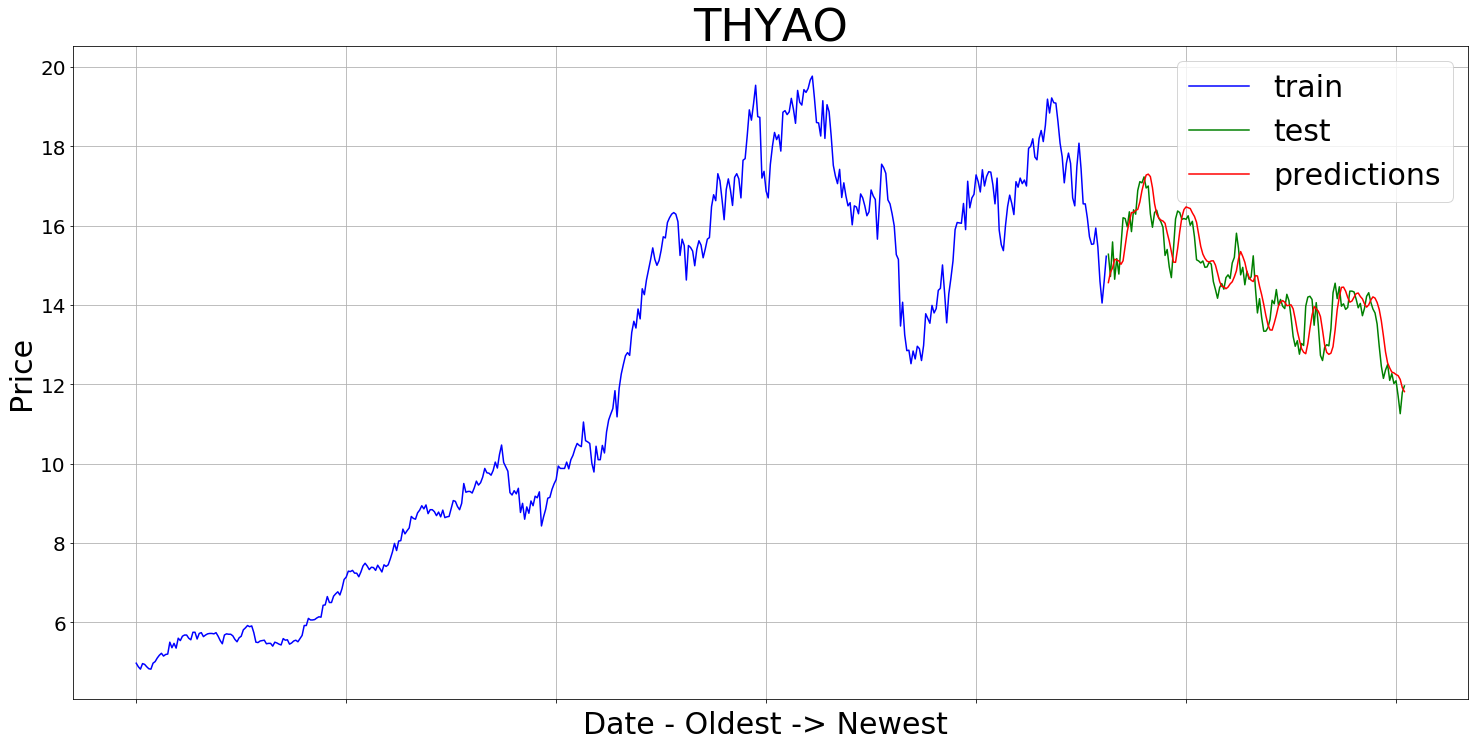

In [37]:
from pylab import rcParams
# Plot adjusted close over time
rcParams['figure.figsize'] = 25, 12 # width 10, height 8

est_df = pd.DataFrame({'Date': stock_data[test_size+(2*lookback):]["Date"],
                       'price': predicted_stock_price_Size.reshape(-1)})

PredictPlot = np.empty_like(Entire_data)
PredictPlot[:, :] = np.nan
PredictPlot[test_size+(2*lookback):len(stock_data), :] = est_df

PredictPlot=pd.DataFrame({'Date' : PredictPlot[:,0], 'price':PredictPlot[:,1]})

ax = PLOT.plot(x='Date', y='Price', style='b-', grid=True,fontsize=20)
ax = testPlot.plot(x='Date', y='Price', style='g-', grid=True, ax=ax)
ax = PredictPlot.plot(x='Date', y='price', style='r-', grid=True, ax=ax)
ax.legend(['train', 'test' , 'predictions'],fontsize=30)
ax.set_xlabel("Date - Oldest -> Newest ",fontsize=30)
ax.set_ylabel("Price",fontsize=30)
ax.set_title('THYAO', fontdict={'fontsize': 45, 'fontweight': 'medium'})

In [38]:
PredictedValue = []
RealValue = []

PredictedValue.append(float(11.68))
RealValue.append(float(11.96))

rmse=math.sqrt(mean_squared_error(RealValue,PredictedValue))
print("RMSE on test set = %3f%%" %  rmse)

RMSE on test set = 0.280000%
